In [1]:
# import modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from scipy.stats import linregress
from scipy import stats

from api_keys import weather_api_key
from citipy import citipy

In [2]:
# generates a random number of random cities into a list of cities
lat_lngs = []

cities = []

lat_range = (-90, 90)
lng_range = (-180, 180)

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


In [3]:
# reads the online API into a JSON file and sets paramters
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
city_data = []
print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    city_url = url + "&q=" + city
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1
    try:
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | isafjordur
Processing Record 5 of Set 1 | pisco
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | moya
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | kailua-kona
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | nova sintra
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | bechar
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | longview
Processing Record 19 of Set 1 | hamilton
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | hirson
Processing Record 22 of Set 1 | olon

In [68]:
# creates a dataframe from these cities
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [69]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,9.81,66,0,8.23,AR,1701992274
1,taunggyi,20.7833,97.0333,14.32,98,52,2.08,MM,1701992499
2,mpanda,-6.3655,31.0409,19.02,96,64,0.54,TZ,1701992500
3,badger,64.8000,-147.5333,-18.05,76,75,2.06,US,1701992500
4,fortuna,40.5982,-124.1573,11.07,92,75,3.09,US,1701992463


In [70]:
# converts the dataframe into a csv
city_data_df.to_csv("cities_dr.csv", index_label = "City ID")

In [71]:
# creates new dataframe from the new csv file
city_data_df = pd.read_csv("cities_dr.csv", index_col = "City ID")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,9.81,66,0,8.23,AR,1701992274
1,taunggyi,20.7833,97.0333,14.32,98,52,2.08,MM,1701992499
2,mpanda,-6.3655,31.0409,19.02,96,64,0.54,TZ,1701992500
3,badger,64.8000,-147.5333,-18.05,76,75,2.06,US,1701992500
4,fortuna,40.5982,-124.1573,11.07,92,75,3.09,US,1701992463


In [72]:
# sets the axes of the following scatter plots
latitudes = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidities = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speeds = city_data_df["Wind Speed"]

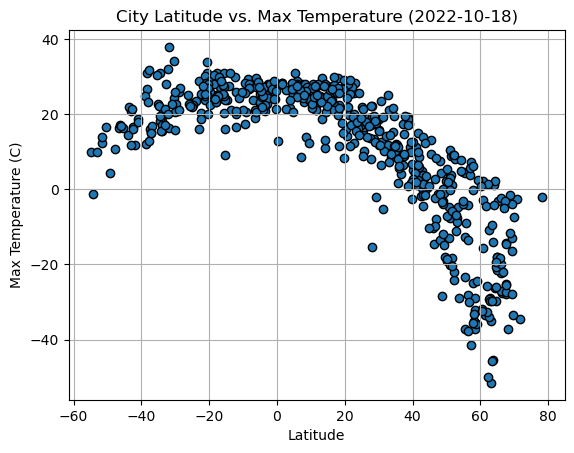

In [137]:
plt.scatter(latitudes, max_temps, marker = "o", edgecolors = 'black')
plt.grid(True)
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.savefig("fig1_dr.png")
plt.show()

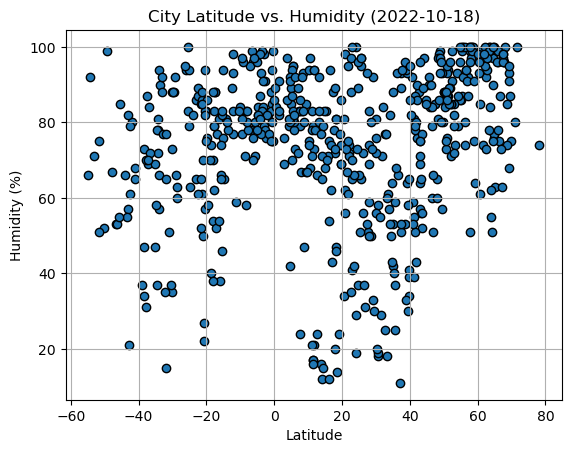

In [138]:
plt.scatter(latitudes, humidities, marker = 'o', edgecolors = 'black')
plt.grid(True)
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("fig2_dr.png")
plt.show()

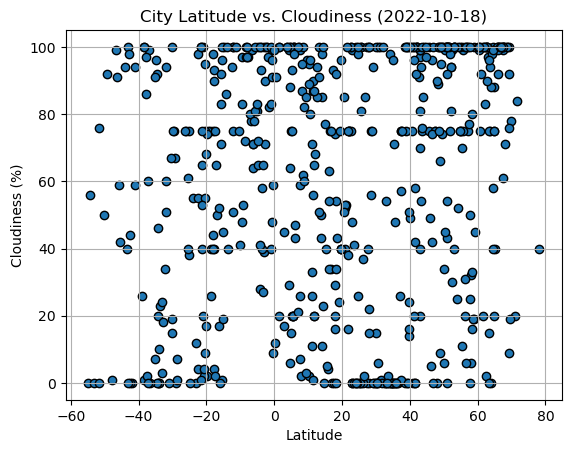

In [139]:
plt.scatter(latitudes, cloudiness, marker = 'o', edgecolors = 'black')
plt.grid(True)
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("fig3_dr.png")
plt.show()

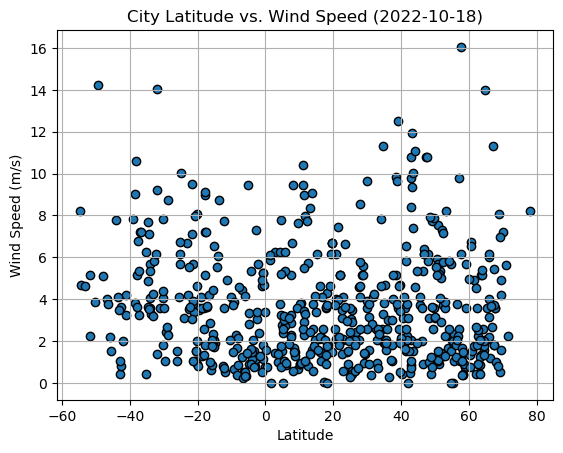

In [140]:
plt.scatter(latitudes, wind_speeds, marker = 'o', edgecolors = 'black')
plt.grid(True)
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.savefig("fig4_dr.png")
plt.show()

In [141]:
# dataframe for northern hemisphere cities
northern_hemi_df = pd.DataFrame(city_data_df)
northern_hemi_df = northern_hemi_df[northern_hemi_df["Lat"] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
1,taunggyi,20.7833,97.0333,14.32,98,52,2.08,MM,1701992499
3,badger,64.8000,-147.5333,-18.05,76,75,2.06,US,1701992500
4,fortuna,40.5982,-124.1573,11.07,92,75,3.09,US,1701992463
6,weno,7.4515,151.8468,27.97,83,100,5.14,FM,1701992500
7,udachny,66.4167,112.4000,-27.53,75,100,1.19,RU,1701992455


In [142]:
# dataframe for southern hemisphere cities
southern_hemi_df = pd.DataFrame(city_data_df)
southern_hemi_df = southern_hemi_df[southern_hemi_df["Lat"] < 0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,9.81,66,0,8.23,AR,1701992274
2,mpanda,-6.3655,31.0409,19.02,96,64,0.54,TZ,1701992500
5,waitangi,-43.9535,-176.5597,14.34,66,94,7.80,NZ,1701992368
8,nova vicosa,-17.8919,-39.3719,25.12,83,4,5.16,BR,1701992500
11,terbanggi besar,-4.8667,105.2333,25.27,84,100,3.33,ID,1701992501


In [153]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df['Max Temp'])
north_max_temp_line = northern_hemi_df["Lat"] * slope + intercept

The r-value is -0.8495711562740855.


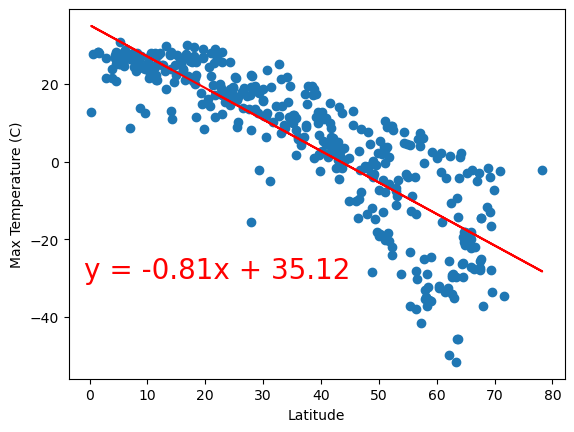

In [154]:
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df['Max Temp'])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (min(northern_hemi_df["Lat"]), max(northern_hemi_df['Max Temp'])), color = 'red', position = (-1, -30), size = 20)
plt.plot(northern_hemi_df["Lat"], north_max_temp_line, "red")
print(f"The r-value is {rvalue}.")
plt.show()

In [155]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df['Max Temp'])
south_max_temp_line = southern_hemi_df["Lat"] * slope + intercept

The r-value is 0.5355992355836777.


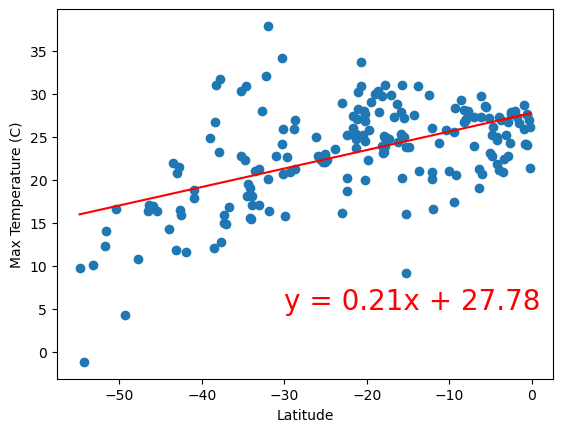

In [156]:
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df['Max Temp'])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (min(northern_hemi_df["Lat"]), max(northern_hemi_df['Max Temp'])), color = 'red', position = (-30, 5), size = 20)
plt.plot(southern_hemi_df["Lat"], south_max_temp_line, "red")
print(f"The r-value is {rvalue}.")
plt.show()

In [ ]:
# The two scatter plots seen here show the correlation between latitude and max temperatures in each of the northern and southern temperatures.
# The -.84 r-value indicates a strong negative correlation between latitude and max temperatures in the northern hemisphere. Most of the points are very close to the trendline.
# The -.53 r-value indicates a moderate positive correlation between latitude and max temperatures in the southern hemisphere. Here the points seem somewhat more scattered than the northern hemisphere.

In [157]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df['Humidity'])
north_humidity_line = northern_hemi_df["Lat"] * slope + intercept

The r-value is 0.3083019343813975.


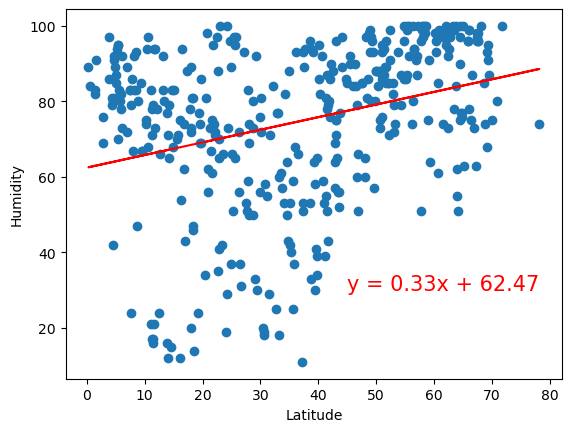

In [163]:
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (min(northern_hemi_df["Lat"]), max(northern_hemi_df['Humidity'])), color = 'red', position = (45, 30), size = 15)
plt.plot(northern_hemi_df["Lat"], north_humidity_line, "red")
print(f"The r-value is {rvalue}.")
plt.show()

In [164]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df['Humidity'])
south_humidity_line = southern_hemi_df["Lat"] * slope + intercept

The r-value is 0.3718566922444526.


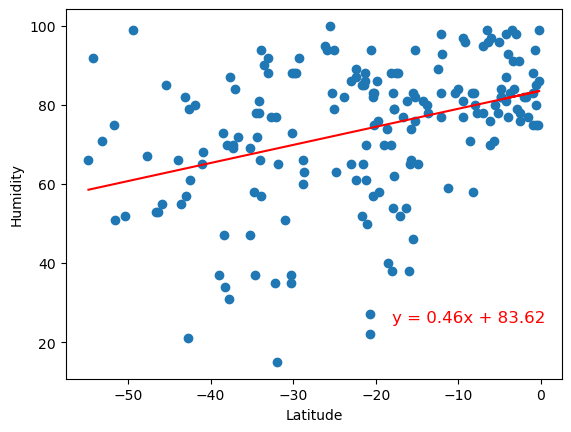

In [170]:
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (min(southern_hemi_df["Lat"]), max(southern_hemi_df['Max Temp'])), color = 'red', position = (-18, 25), size = 12)
plt.plot(southern_hemi_df["Lat"], south_humidity_line, "red")
print(f"The r-value is {rvalue}.")
plt.show()

In [ ]:
# The two scatter plots seen here show the correlation between latitude and humidity in each of the northern and southern temperatures.
# The .30 r-value indicates a very weak positive correlation between latitude and humidity in the northern hemisphere.  
# The .37 r-value also indicates a weak positive correlation between latitude and humidity in the southern hemisphere. In neither hemisphere does it seem that latitude affects the humidity of these cities.

In [171]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df['Cloudiness'])
north_cloudiness_line = northern_hemi_df["Lat"] * slope + intercept

The r-value is 0.19468546212439036.


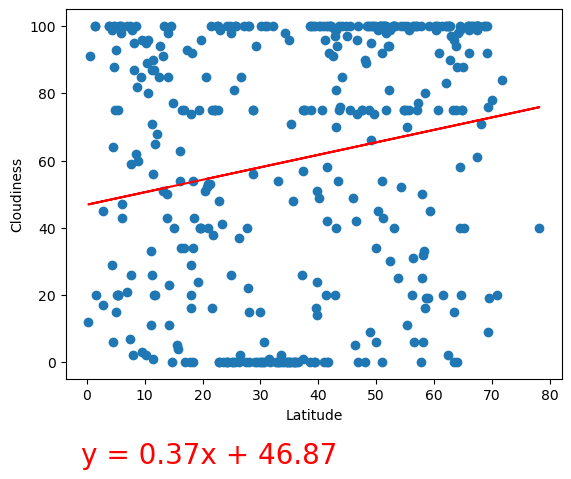

In [175]:
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (min(northern_hemi_df["Lat"]), max(northern_hemi_df['Cloudiness'])), color = 'red', position = (-1, -30), size = 20)
plt.plot(northern_hemi_df["Lat"], north_cloudiness_line, "red")
print(f"The r-value is {rvalue}.")
plt.show()

In [176]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df['Cloudiness'])
south_cloudiness_line = southern_hemi_df["Lat"] * slope + intercept

The r-value is 0.3325641299060516.


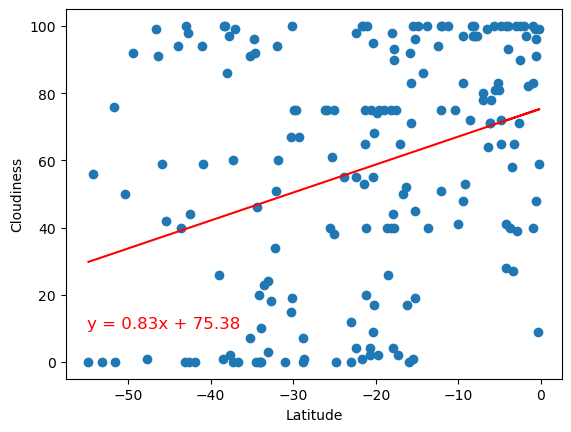

In [186]:
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (min(southern_hemi_df["Lat"]), max(southern_hemi_df['Cloudiness'])), color = 'red', position = (-55, 10), size = 12)
plt.plot(southern_hemi_df["Lat"], south_cloudiness_line, "red")
print(f"The r-value is {rvalue}.")
plt.show()

In [ ]:
# The two scatter plots seen here show the correlation between latitude and cloudiness in each of the northern and southern temperatures.
# The .19 r-value indicates an almost non-existent positive correlation between latitude and cloudiness in the northern hemisphere.  
# The .33 r-value also indicates a very weak positive correlation between latitude and cloudiness in the southern hemisphere. In neither hemisphere does it seem that latitude affects the cloudiness of these cities.

In [187]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df['Wind Speed'])
north_wind_line = northern_hemi_df["Lat"] * slope + intercept

The r-value is 0.0485719647558798.


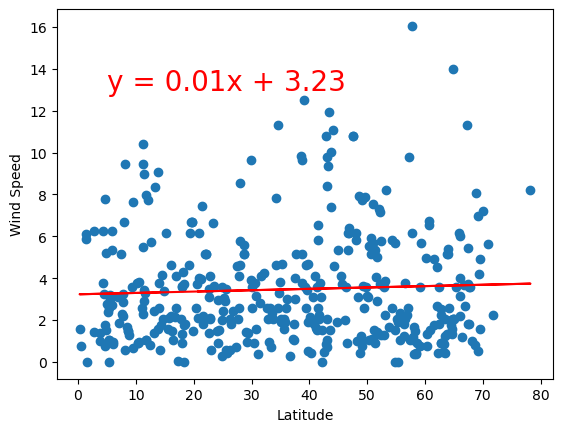

In [189]:
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (min(northern_hemi_df["Lat"]), max(northern_hemi_df['Wind Speed'])), color = 'red', position = (5, 13), size = 20)
plt.plot(northern_hemi_df["Lat"], north_wind_line, "red")
print(f"The r-value is {rvalue}.")
plt.show()

In [190]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df['Wind Speed'])
south_wind_line = southern_hemi_df["Lat"] * slope + intercept

The r-value is -0.31947535973169716.


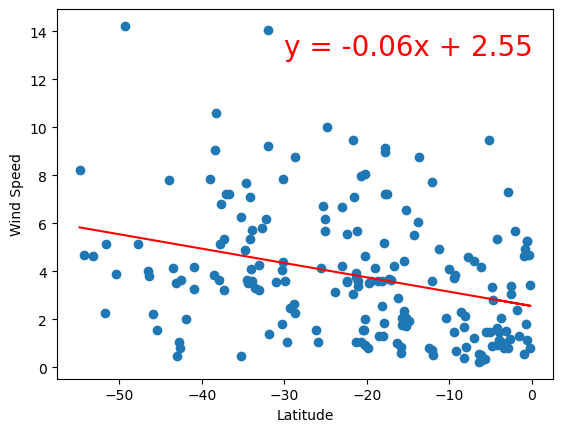

In [193]:
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (min(southern_hemi_df["Lat"]), max(southern_hemi_df['Wind Speed'])), color = 'red', position = (-30, 13), size = 20)
plt.plot(southern_hemi_df["Lat"], south_wind_line, "red")
print(f"The r-value is {rvalue}.")
plt.show()

In [ ]:
# The two scatter plots seen here show the correlation between latitude and wind speed in each of the northern and southern temperatures.
# The .04 r-value indicates that there is no correlation between latitude and wind speed in the northern hemisphere.  
# The -.31 r-value indicates a very weak negative correlation between latitude and wind speed in the southern hemisphere. In neither hemisphere does it seem that latitude affects the wind speed of these cities.